In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
ori_df = df.copy()

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


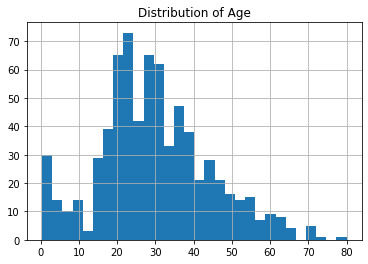

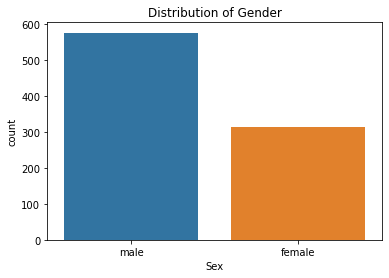

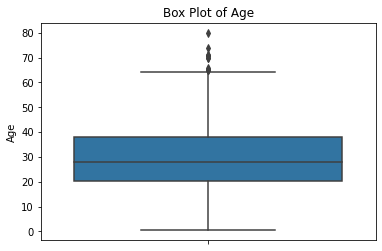

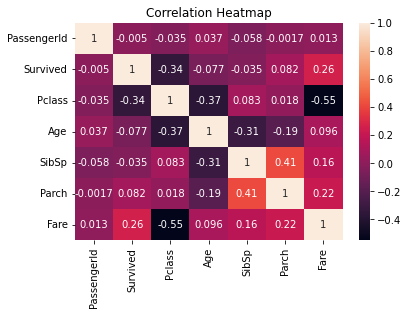

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [6]:
# Visualizations
# Histogram of Age
df['Age'].hist(bins=30)
plt.title('Distribution of Age')
plt.show()

# Bar Plot of Gender
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Gender')
plt.show()

# Box Plot of Age
sns.boxplot(y='Age', data=df)
plt.title('Box Plot of Age')
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
# Age and Fare high correlated compare to others (will be the feature importance)

# Feature Relationships
# Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

In [7]:
#create new feature to know the family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [8]:
#drop not importance feature
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,4
889,1,1,male,26.0,0,0,30.0000,C,1


In [10]:
#check missing value
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [11]:
#fill category variable with mode for missing value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [12]:
#fill missing value with median 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
#turn category variable into number by using label encoder
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [14]:
categorical_cols

['Sex', 'Embarked']

In [15]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [16]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
5,1,1
6,1,2
7,1,2
8,0,2
9,0,0


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,28.0,1,2,23.4500,2,4
889,1,1,1,26.0,0,0,30.0000,0,1


In [18]:
#standardise the value make it easy for modelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.565736,1,0,-0.502445,2,2
1,1,1,0,0.663861,1,0,0.786845,0,2
2,1,3,0,-0.258337,0,0,-0.488854,2,1
3,1,1,0,0.433312,1,0,0.420730,2,2
4,0,3,1,0.433312,0,0,-0.486337,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2,1
887,1,1,0,-0.796286,0,0,-0.044381,2,1
888,0,3,0,-0.104637,1,2,-0.176263,2,4
889,1,1,1,-0.258337,0,0,-0.044381,0,1


In [20]:
import warnings
warnings.filterwarnings('ignore')
# Data Split and Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb

X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, best_model

def logistic_regression_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=200)
    param_grid = {'C': [0.1, 1, 10, 100]}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)

def decision_tree_model(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)

def random_forest_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier()
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
'''
def svm_model(X_train, y_train, X_test, y_test):
    model = svm.SVC()
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
'''
def xgboost_model(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier()
    param_grid = {'n_estimators': [100, 200, 300],'max_depth': [5, 10, 15],'use_label_encoder': [False],'eval_metric': ['logloss']}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
    
def lgb_model(X_train, y_train, X_test, y_test):
    model = lgb.LGBMClassifier()
    param_grid = {'n_estimators': [100, 200, 300],'max_depth': [5, 10, 15]}
    return train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)


# Train and evaluate each model
models = {
    'Logistic Regression': logistic_regression_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'XGBoost':xgboost_model,
    'LightBGM':lgb_model
}

results = []
best_models = {}
for model_name, model_func in models.items():
    accuracy, best_model = model_func(X_train, y_train, X_test, y_test)
    results.append((model_name, accuracy))
    print(model_name, accuracy)
    best_models[model_name] = best_model

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)

#best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"The best model is: {best_model_name}")

# Use the best model for prediction on new data
best_model = best_models[best_model_name]

Logistic Regression 0.8100558659217877
Decision Tree 0.8268156424581006
Random Forest 0.8435754189944135
XGBoost 0.8044692737430168
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain,

In [24]:
df_test = pd.read_csv('titanic/test.csv')
df_test_ori = df_test.copy()
print(df_test_ori)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
categorical_feature_mask = df_test.dtypes==object
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda col: le.fit_transform(col))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test[['Age', 'Fare']] = scaler.fit_transform(df_test[['Age', 'Fare']])
print(df_test)

# Predict on test data 
predictions = best_model.predict(df_test)
print("Predictions on test data:")
print(predictions)
pred = pd.DataFrame(predictions,columns=['Survived'])


     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [25]:
final_test = pd.merge(df_test_ori,pred,left_index=True, right_index=True)
final_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Feature ranking:
1. Sex: 0.27029467515381794
2. Fare: 0.2629109973188188
3. Age: 0.24802678407369774
4. Pclass: 0.07994593453272747
5. FamilySize: 0.04941304213917841
6. Embarked: 0.03366401621761338
7. SibSp: 0.032179893429750424
8. Parch: 0.02356465713439587


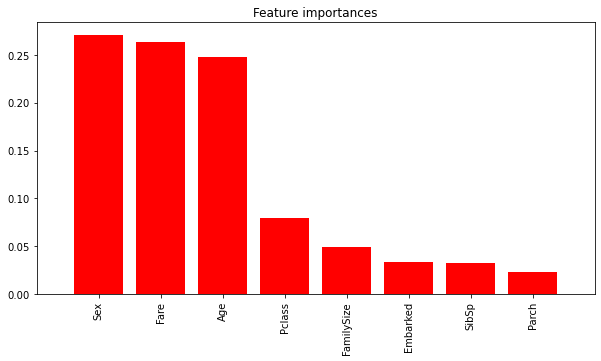

In [26]:
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [28]:
Submission = final_test[['PassengerId','Survived']]
Submission.to_csv('titatnic_submission.csv')